In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

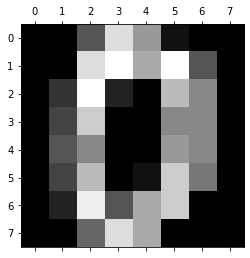

In [6]:
plt.gray()
plt.matshow(digits.images[0])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,train_size=0.8)

In [11]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier



In [12]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(digits.data, digits.target)
clf.cv_results_

{'mean_fit_time': array([0.70280185, 0.07625647, 0.69657311, 0.07514558, 0.70981069,
        0.07269282]),
 'std_fit_time': array([0.017907  , 0.00295165, 0.00433396, 0.00612156, 0.01465843,
        0.0050217 ]),
 'mean_score_time': array([0.20566263, 0.02531042, 0.21131301, 0.02501216, 0.20282521,
        0.02065701]),
 'std_score_time': array([0.00541144, 0.00765386, 0.0077546 , 0.00765937, 0.00832822,
        0.00381579]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],


In [14]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.702802,0.017907,0.205663,0.005411,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.411111,0.450000,0.454039,0.448468,0.479109,0.448545,0.021761,6
1,0.076256,0.002952,0.025310,0.007654,1,linear,"{'C': 1, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,1
2,0.696573,0.004334,0.211313,0.007755,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.452778,0.469444,0.479109,0.479109,0.501393,0.476366,0.015784,4
3,0.075146,0.006122,0.025012,0.007659,10,linear,"{'C': 10, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,1
4,0.709811,0.014658,0.202825,0.008328,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.452778,0.469444,0.479109,0.479109,0.501393,0.476366,0.015784,4
5,0.072693,0.005022,0.020657,0.003816,20,linear,"{'C': 20, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,1


In [15]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
      'DecisionTreeClassifier' : {
        'model': DecisionTreeClassifier(),
        'params': {
           
        }
      },
      'GaussianNB' : {
        'model': GaussianNB(),
        'params': {
         
        }
    },
      'MultinomialNB' : {
        'model': MultinomialNB(),
        'params': {
          
        }
    }
}

In [16]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(digits.data, digits.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.947697,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.903205,{'n_estimators': 10}
2,logistic_regression,0.922114,{'C': 1}
3,DecisionTreeClassifier,0.780794,{}
4,GaussianNB,0.806928,{}
5,MultinomialNB,0.870350,{}
